# outlier_removal_regression

[[5.07793064]]
[25.21002155]
0.8782624703664675


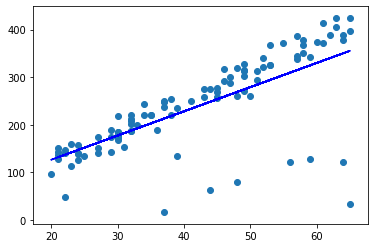

[[6.36859481]]
[-6.91861069]
0.983189455395532


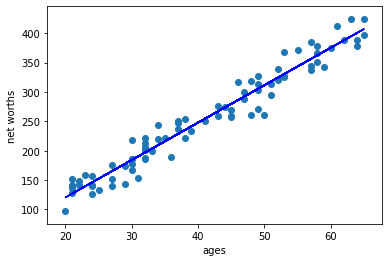

In [2]:
import random
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "rb") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "rb") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.model_selection import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like



from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(ages_train, net_worths_train)


print(reg.coef_)
print(reg.intercept_)

print(reg.score(ages_test, net_worths_test))







try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()


### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
#     res=abs(net_worths_train-predictions)
#     err, a,n = zip(*sorted(zip(res, ages_train,net_worths_train)))
#     cleaned_data=(a[:81],n[:81],err[:81])
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print ("your regression object doesn't exist, or isn't name reg")
    print ("can't make predictions to use in identifying outliers")







### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
#     ages, net_worths, errors = zip(*cleaned_data)
    ages, net_worths, errors = cleaned_data
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        print(reg.coef_)
        print(reg.intercept_)

        print(reg.score(ages_test, net_worths_test))
        plt.plot(ages, reg.predict(ages), color="blue")
    except NameError:
        print ("you don't seem to have regression imported/created,")
        print ("   or else your regression object isn't named reg")
        print ("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print ("outlierCleaner() is returning an empty list, no refitting to be done")



# enron_outliers

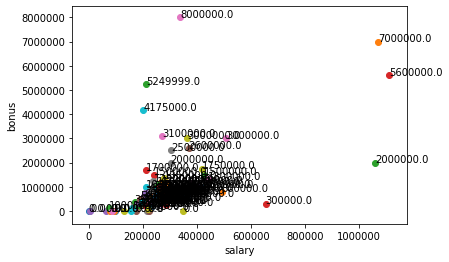

In [18]:
import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "rb") )
# featuresaa = ["salary", "bonus","email_address"]
features = ["salary", "bonus"]
data_dict.pop( 'TOTAL', 0 )
data = featureFormat(data_dict, features)
for point in data:
    salary = point[0]
    bonus = point[1]
    email = point[1]
    matplotlib.pyplot.scatter( salary, bonus )
    matplotlib.pyplot.text( salary, bonus,email)

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

{'METTS MARK': {'salary': 365788,
  'to_messages': 807,
  'deferral_payments': 'NaN',
  'total_payments': 1061827,
  'loan_advances': 'NaN',
  'bonus': 600000,
  'email_address': 'mark.metts@enron.com',
  'restricted_stock_deferred': 'NaN',
  'deferred_income': 'NaN',
  'total_stock_value': 585062,
  'expenses': 94299,
  'from_poi_to_this_person': 38,
  'exercised_stock_options': 'NaN',
  'from_messages': 29,
  'other': 1740,
  'from_this_person_to_poi': 1,
  'poi': False,
  'long_term_incentive': 'NaN',
  'shared_receipt_with_poi': 702,
  'restricted_stock': 585062,
  'director_fees': 'NaN'},
 'BAXTER JOHN C': {'salary': 267102,
  'to_messages': 'NaN',
  'deferral_payments': 1295738,
  'total_payments': 5634343,
  'loan_advances': 'NaN',
  'bonus': 1200000,
  'email_address': 'NaN',
  'restricted_stock_deferred': 'NaN',
  'deferred_income': -1386055,
  'total_stock_value': 10623258,
  'expenses': 11200,
  'from_poi_to_this_person': 'NaN',
  'exercised_stock_options': 6680544,
  'from_